In [ ]:
import pandas as pd

def get_data():
    file = "1preproc.tsv"
    data_all = pd.read_csv(file, sep='\t', header=None, quoting=3, error_bad_lines=False)
    data_all[0] = data_all[0].astype(str)

    data = data_all.iloc[:, 0]
    target = data_all.iloc[:, 1]

    target = target.astype("category").cat.codes

    split = 0.8
    n = int(len(data) * split)
    train_data = data[:n]
    train_target = target[:n]
    test_data = data[n:]
    test_target = target[n:]

    print("classes: 0-cy, 1-en, 2-ga, 3-gd")

    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        print(train_data[train_data.str.split().str.len().lt(3)])

    return train_data, train_target, test_data, test_target

train_data, train_target, test_data, test_target = get_data()

classes: 0-cy, 1-en, 2-ga, 3-gd
484        arhoswch gwaeddodd
1539      tuirtin righeamhuil
1841               don aimsir
1873    conchubhar máighistir
1961               right yeah
2605          duilluir spuinc
3633       mionghearraigh iad
3917     chachachachailleas é
5167       genitive preucháin
5317       imtheachta aeniasa
Name: 0, dtype: object


In [ ]:
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [ ]:
from gensim.models import Phrases
import gensim.corpora as corpora
tokens = list(sent_to_words(train_data))
bigram_model = Phrases(tokens)
trigram_model = Phrases(bigram_model[tokens], min_count=1)
tokens = list(trigram_model[bigram_model[tokens]])

id2word = corpora.Dictionary(tokens)
id2word.filter_extremes(no_below=3)
corpus = [id2word.doc2bow(tok) for tok in tokens]

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
# import gensim.corpora as corpora

# # data_words = list(sent_to_words(train_data))

# # Create Dictionary
# id2word = corpora.Dictionary(data_words)

# # Create Corpus
# texts = data_words

# # Term Document Frequency
# corpus = [id2word.doc2bow(text) for text in texts]


In [ ]:
from pprint import pprint
import numpy as np

# number of topics
num_topics = 4

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                    #    alpha=[0.001]*num_topics,
                                       alpha=[0.001, 0.001, 0.001, 0.001],
                                    #    eta=[0.02]*len(id2word.keys()))
                                        eta=0.01)
                                    #    decay=0.8)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a diffe

[(0,
  '0.053*"agus" + 0.037*"an" + 0.026*"na" + 0.023*"do" + 0.019*"ar" + '
  '0.017*"air" + 0.011*"yn" + 0.008*"le" + 0.008*"is" + 0.008*"sin"'),
 (1,
  '0.026*"na" + 0.021*"yn" + 0.020*"ar" + 0.015*"agus" + 0.008*"an" + '
  '0.008*"air" + 0.007*"do" + 0.007*"le" + 0.007*"am" + 0.006*"go"'),
 (2,
  '0.022*"and" + 0.016*"the" + 0.014*"yn" + 0.013*"an" + 0.011*"of" + '
  '0.011*"ar" + 0.010*"am" + 0.009*"to" + 0.008*"agus" + 0.008*"in"'),
 (3,
  '0.037*"an" + 0.020*"agus" + 0.020*"air" + 0.018*"ar" + 0.017*"is" + '
  '0.013*"do" + 0.011*"na" + 0.009*"ach" + 0.008*"sin" + 0.008*"bha"')]


/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 6.4MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=e00641145213c886f69ecb4a77db07db9a870d7970969261712ccd4a8afe6418
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [ ]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(num_topics))

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_'+ str(num_topics) +'.html')

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.103179 -0.038128       1        1  42.332235
3      0.061893 -0.070419       2        1  20.580572
2     -0.176618 -0.037409       3        1  18.698448
1      0.011546  0.145956       4        1  18.388746, topic_info=    Term         Freq        Total Category  logprob  loglift
98   and   374.000000   374.000000  Default  30.0000  30.0000
129  the   348.000000   348.000000  Default  29.0000  29.0000
18    na  1331.000000  1331.000000  Default  28.0000  28.0000
46    an  1940.000000  1940.000000  Default  27.0000  27.0000
437   of   229.000000   229.000000  Default  26.0000  26.0000
..   ...          ...          ...      ...      ...      ...
149   so    55.623302   410.861738   Topic4  -5.4502  -0.3062
366   or    38.990028   149.807170   Topic4  -5.8055   0.3474
181   is    55.188689   656.041638   Topic4  -5.4580  -0.7820
98   and    45.051994   374.106256   Topic4  -5.6610  -0.4233
155   ag    41.716879   322.967803   Topic4  -5.7379  -0.3532

[400 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
440       1  0.253026          ac
440       2  0.145256          ac
440       3  0.262397          ac
440       4  0.337368          ac
2658      4  0.989270    ac_felly
...     ...       ...         ...
193       1  0.291677          yr
193       2  0.133685          yr
193       3  0.273447          yr
193       4  0.297753          yr
3551      2  0.895939  yr_un_modd

[702 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 2])

In [ ]:
data = train_data
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data, labels=train_target):
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    lab = pd.Series(labels)
    sent_topics_df = pd.concat([sent_topics_df, contents, lab], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=train_data, labels=train_target)
print(df_topic_sents_keywords.head(10))

# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)
 
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text", "Label"]

sent_topics_sorteddf_mallet.head(7)

   Dominant_Topic  ...  0
0             1.0  ...  0
1             0.0  ...  0
2             3.0  ...  0
3             0.0  ...  3
4             0.0  ...  2
5             3.0  ...  2
6             3.0  ...  3
7             3.0  ...  0
8             1.0  ...  0
9             0.0  ...  2

[10 rows x 5 columns]


,Topic_Num,Topic_Perc_Contrib,Keywords,Text,Label
0,0.0,0.9999,"agus, an, na, do, ar, air, yn, le, is, sin",agus an tan adchonnairc an teasbog é go fíorai...,2
1,1.0,0.9999,"na, yn, ar, agus, an, air, do, le, am, go",yna agorwyd drws mawr derw a hyrddiwyd y ddau ...,0
2,2.0,0.9999,"and, the, yn, an, of, ar, am, to, agus, in",he could no longer remember who they were but ...,1
3,3.0,0.9999,"an, agus, air, ar, is, do, na, ach, sin, bha",ach ged is e adhamh ceud athair a chinne dhaon...,3


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns

def print_cm(test_target, y_pred):
    ax = plt.subplot()
    sns.heatmap(confusion_matrix(test_target, y_pred), annot=True, cmap='Spectral', fmt='g')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.xaxis.set_ticklabels(["Welsh", "English", "Irish", "Scottish"])
    ax.yaxis.set_ticklabels(["Welsh", "English", "Irish", "Scottish"])
    plt.show()

In [ ]:
# Prepare test data
tokens_test = list(sent_to_words(test_data))
bigram_model_test = Phrases(tokens_test)
trigram_model_test = Phrases(bigram_model_test[tokens_test], min_count=1)
tokens_test = list(trigram_model_test[bigram_model_test[tokens_test]])

corpus_test = [id2word.doc2bow(tok) for tok in tokens_test]

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
import numpy as np
num_topics = 4

def get_topics_prop(ldamodel=lda_model, corpus=corpus, texts=train_data):
    sent_topics_df = list()

    for i, row in enumerate(ldamodel[corpus]):
        row_prop = np.zeros(num_topics)
        for j, (topic_num, prop_topic) in enumerate(row):
            row_prop[topic_num] = prop_topic

        sent_topics_df.append(row_prop)

    sent_topics_df = pd.DataFrame(sent_topics_df)
    pred = sent_topics_df

    return(pred)

# get topics for train set
pred_topic = get_topics_prop(ldamodel=lda_model, corpus=corpus, texts=train_data)

from sklearn.feature_extraction.text import CountVectorizer
NGRAM_MIN = 2
NGRAM_MAX = 3
analyzer = 'char_wb'
vect = CountVectorizer(ngram_range=(NGRAM_MIN, NGRAM_MAX), analyzer=analyzer)
vect.fit(train_data)

# comment to not use ngrmas
pred_topic = pd.concat([pred_topic, pd.DataFrame(vect.transform(train_data).toarray())], axis=1)

exp_train_data = pred_topic
exp_train_target = train_target

# uncomment for reduced dataset
# split = 0.3
# n = int(exp_train_data.shape[0] * split)
# exp_train_data = exp_train_data[:n]
# exp_train_target = exp_train_target[:n]

# test data
pred_topic_test = get_topics_prop(ldamodel=lda_model, corpus=corpus_test, texts=test_data)

# comment to not use ngrmas
pred_topic_test = pd.concat([pred_topic_test, pd.DataFrame(vect.transform(test_data).toarray())], axis=1)

exp_test_data = pred_topic_test
exp_test_target = test_target

print(exp_train_data.shape)
print(exp_test_data.shape)


(2382, 9828)
(1986, 9828)


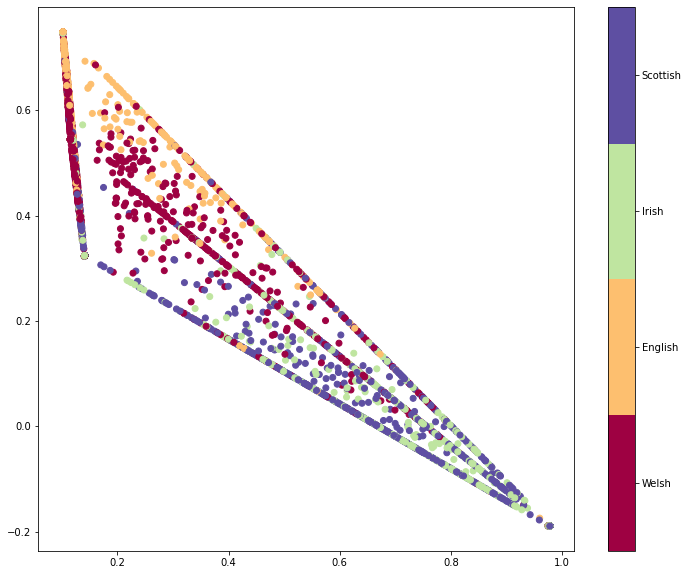

In [ ]:
# visualisation of train set features in 2D (here only topics)
from sklearn.decomposition import TruncatedSVD
pca = TruncatedSVD(n_components=2).fit(exp_train_data)
data2D = pca.transform(exp_train_data)

plt.figure(figsize=(12, 10))
plt.scatter(data2D[:, 0], data2D[:, 1], cmap=plt.cm.get_cmap('Spectral', 4), c=exp_train_target)
cbar = plt.colorbar()
cbar.set_ticks([0.375, 1.125, 1.875, 2.625])
cbar.set_ticklabels(["Welsh", "English", "Irish", "Scottish"])

accuracy  0.9647532729103726
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       613
           1       0.97      0.99      0.98       301
           2       0.92      0.96      0.94       534
           3       0.98      0.92      0.95       538

    accuracy                           0.96      1986
   macro avg       0.97      0.97      0.97      1986
weighted avg       0.97      0.96      0.96      1986

MCC:  0.9524925178134752


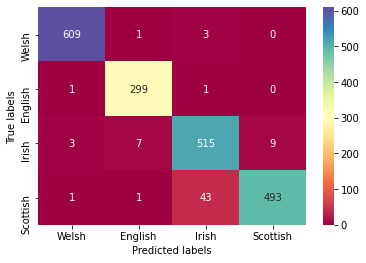

In [ ]:
# SVM
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=1, degree=4)
svm = svm.fit(exp_train_data, exp_train_target)
pred = svm.predict(exp_test_data)

acc = np.mean(pred == exp_test_target)
print("accuracy ", acc)
print(classification_report(exp_test_target, pred))
print('MCC: ', matthews_corrcoef(exp_test_target, pred))

print_cm(test_target, pred)

Epoch 1/20
15/15 [==============================] - 1s 49ms/step - loss: 1.1016 - acc: 0.4538 - val_loss: 0.5823 - val_acc: 0.6855
Epoch 2/20
15/15 [==============================] - 0s 28ms/step - loss: 0.5210 - acc: 0.6728 - val_loss: 0.4358 - val_acc: 0.7421
Epoch 3/20
15/15 [==============================] - 0s 30ms/step - loss: 0.3916 - acc: 0.7919 - val_loss: 0.3620 - val_acc: 0.9497
Epoch 4/20
15/15 [==============================] - 0s 28ms/step - loss: 0.2729 - acc: 0.9847 - val_loss: 0.2495 - val_acc: 0.9665
Epoch 5/20
15/15 [==============================] - 0s 28ms/step - loss: 0.1434 - acc: 0.9962 - val_loss: 0.1738 - val_acc: 0.9665
Epoch 6/20
15/15 [==============================] - 0s 28ms/step - loss: 0.0552 - acc: 0.9995 - val_loss: 0.1618 - val_acc: 0.9706
Epoch 7/20
15/15 [==============================] - 0s 28ms/step - loss: 0.0263 - acc: 0.9988 - val_loss: 0.1609 - val_acc: 0.9644
Epoch 8/20
15/15 [==============================] - 0s 29ms/step - loss: 0.0153 - a

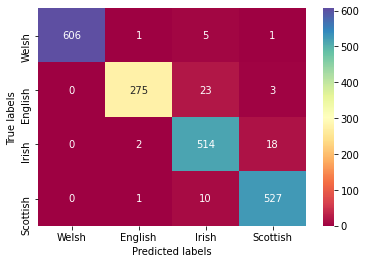

In [ ]:
# FF
from keras.layers import Dense, Input
from keras import Model
from keras.utils import to_categorical
from keras.optimizers import Adam

train_target_cat = to_categorical(exp_train_target)
test_target_cat = to_categorical(test_target)

inputs = Input(shape=(exp_train_data.shape[1],))
x = Dense(100, activation="relu")(inputs)
x = Dense(40, activation="relu")(x)
x = Dense(10, activation="relu")(x)
x = Dense(units=4, activation="softmax")(x)

model = Model(inputs, x)

adam = Adam(lr=0.001)
model.compile(optimizer=adam, loss="categorical_crossentropy", metrics=['acc'])
model.fit(exp_train_data, train_target_cat, batch_size=128, epochs=20, verbose=1, validation_split=0.2)

print("test:")
scores = model.evaluate(exp_test_data, test_target_cat, verbose=2)
print(scores)

y_pred = model.predict(exp_test_data)
y_norm = np.stack([to_categorical(np.asarray(x.argmax()), num_classes=4) for x in y_pred])
print(classification_report(test_target_cat, y_norm))
print('MCC: ', matthews_corrcoef(test_target, np.argmax(y_norm, axis=1)))
print("classes: 0-cy, 1-en, 2-ga, 3-gd")
print_cm(test_target, np.argmax(y_norm, axis=1))

In [ ]:
# save model
lda_model.save("lda_model-4topics-present")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:471: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:471: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:471: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


In [ ]:
# import saved model

import gensim
from gensim.models import Phrases
import gensim.corpora as corpora
from pprint import pprint

saved_model = gensim.models.LdaMulticore.load("./lda_model/lda_model-4topics-present")
pprint(saved_model.print_topics())

lda_model = saved_model

id2word = corpora.Dictionary.load('./lda_model/lda_model-4topics-present.id2word')

tokens = list(sent_to_words(train_data))
bigram_model = Phrases(tokens)
trigram_model = Phrases(bigram_model[tokens], min_count=1)
tokens = list(trigram_model[bigram_model[tokens]])

corpus = [id2word.doc2bow(tok) for tok in tokens]

[(0,
  '0.053*"agus" + 0.037*"an" + 0.026*"na" + 0.023*"do" + 0.019*"ar" + '
  '0.017*"air" + 0.011*"yn" + 0.008*"le" + 0.008*"is" + 0.008*"sin"'),
 (1,
  '0.026*"na" + 0.021*"yn" + 0.020*"ar" + 0.015*"agus" + 0.008*"an" + '
  '0.008*"air" + 0.007*"do" + 0.007*"le" + 0.007*"am" + 0.006*"go"'),
 (2,
  '0.022*"and" + 0.016*"the" + 0.014*"yn" + 0.013*"an" + 0.011*"of" + '
  '0.011*"ar" + 0.010*"am" + 0.009*"to" + 0.008*"agus" + 0.008*"in"'),
 (3,
  '0.037*"an" + 0.020*"agus" + 0.020*"air" + 0.018*"ar" + 0.017*"is" + '
  '0.013*"do" + 0.011*"na" + 0.009*"ach" + 0.008*"sin" + 0.008*"bha"')]


/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
